**Note:** to view plots you must either download and run the file locally, or [view it through the nbviewer](http://nbviewer.jupyter.org/github/kstrm/Starting-out-with-python/blob/master/03b%20Derivatives-Interactive.ipynb).

# Finite Difference Examples

Load up the needed packages

In [1]:
%pylab notebook
%config InlineBackend.figure_format='retina' #use this if you have a retina display... comment out when printing to pdf

Populating the interactive namespace from numpy and matplotlib


### Setup

<IPython.core.display.Javascript object>


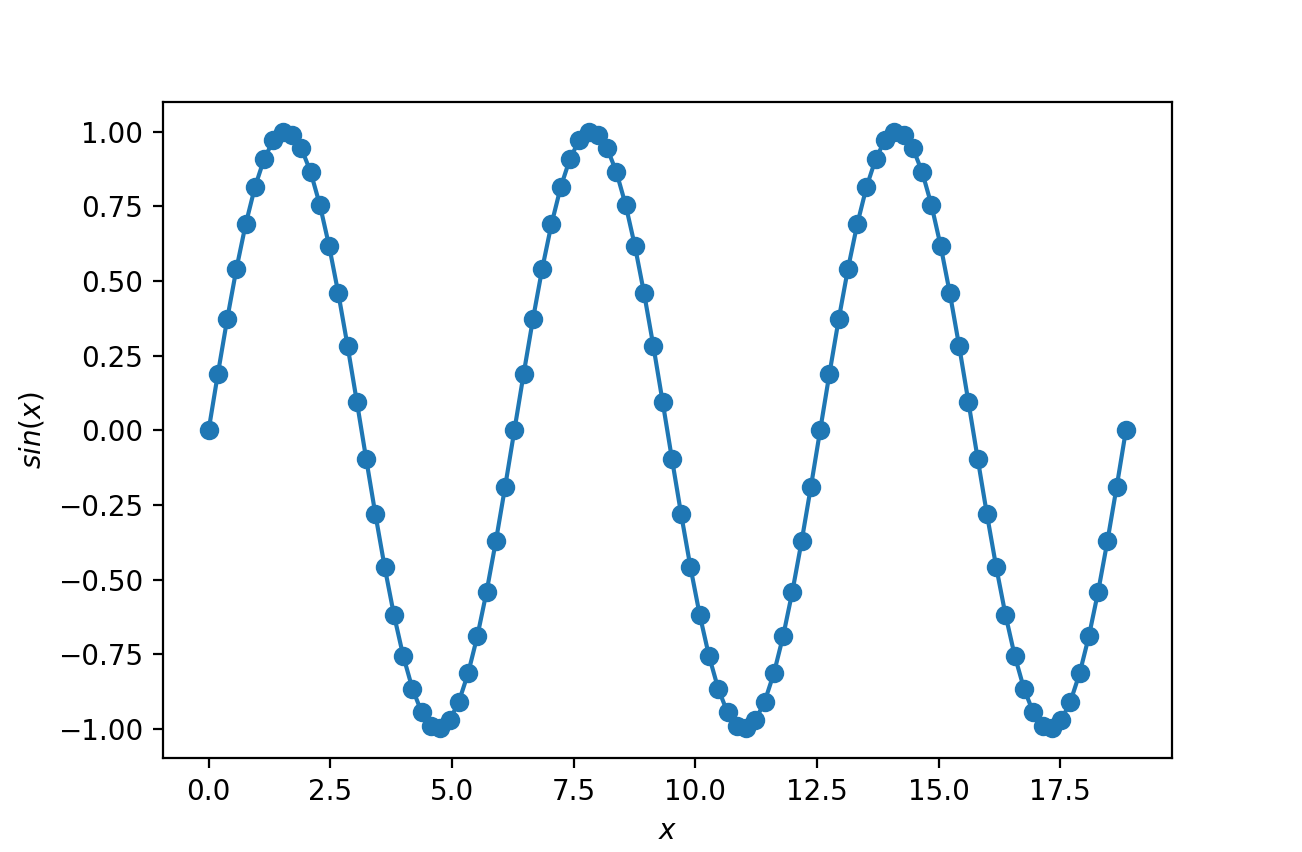

In [3]:
# setup disretized array
N = 100
ilast = N-1
x = linspace(0,6*pi,N)
y = sin(x)

# plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y,marker='o')
ax.set_xlabel('$x$')
ax.set_ylabel('$sin(x)$');

### Methods for differencing: loops vs array operations

<IPython.core.display.Javascript object>


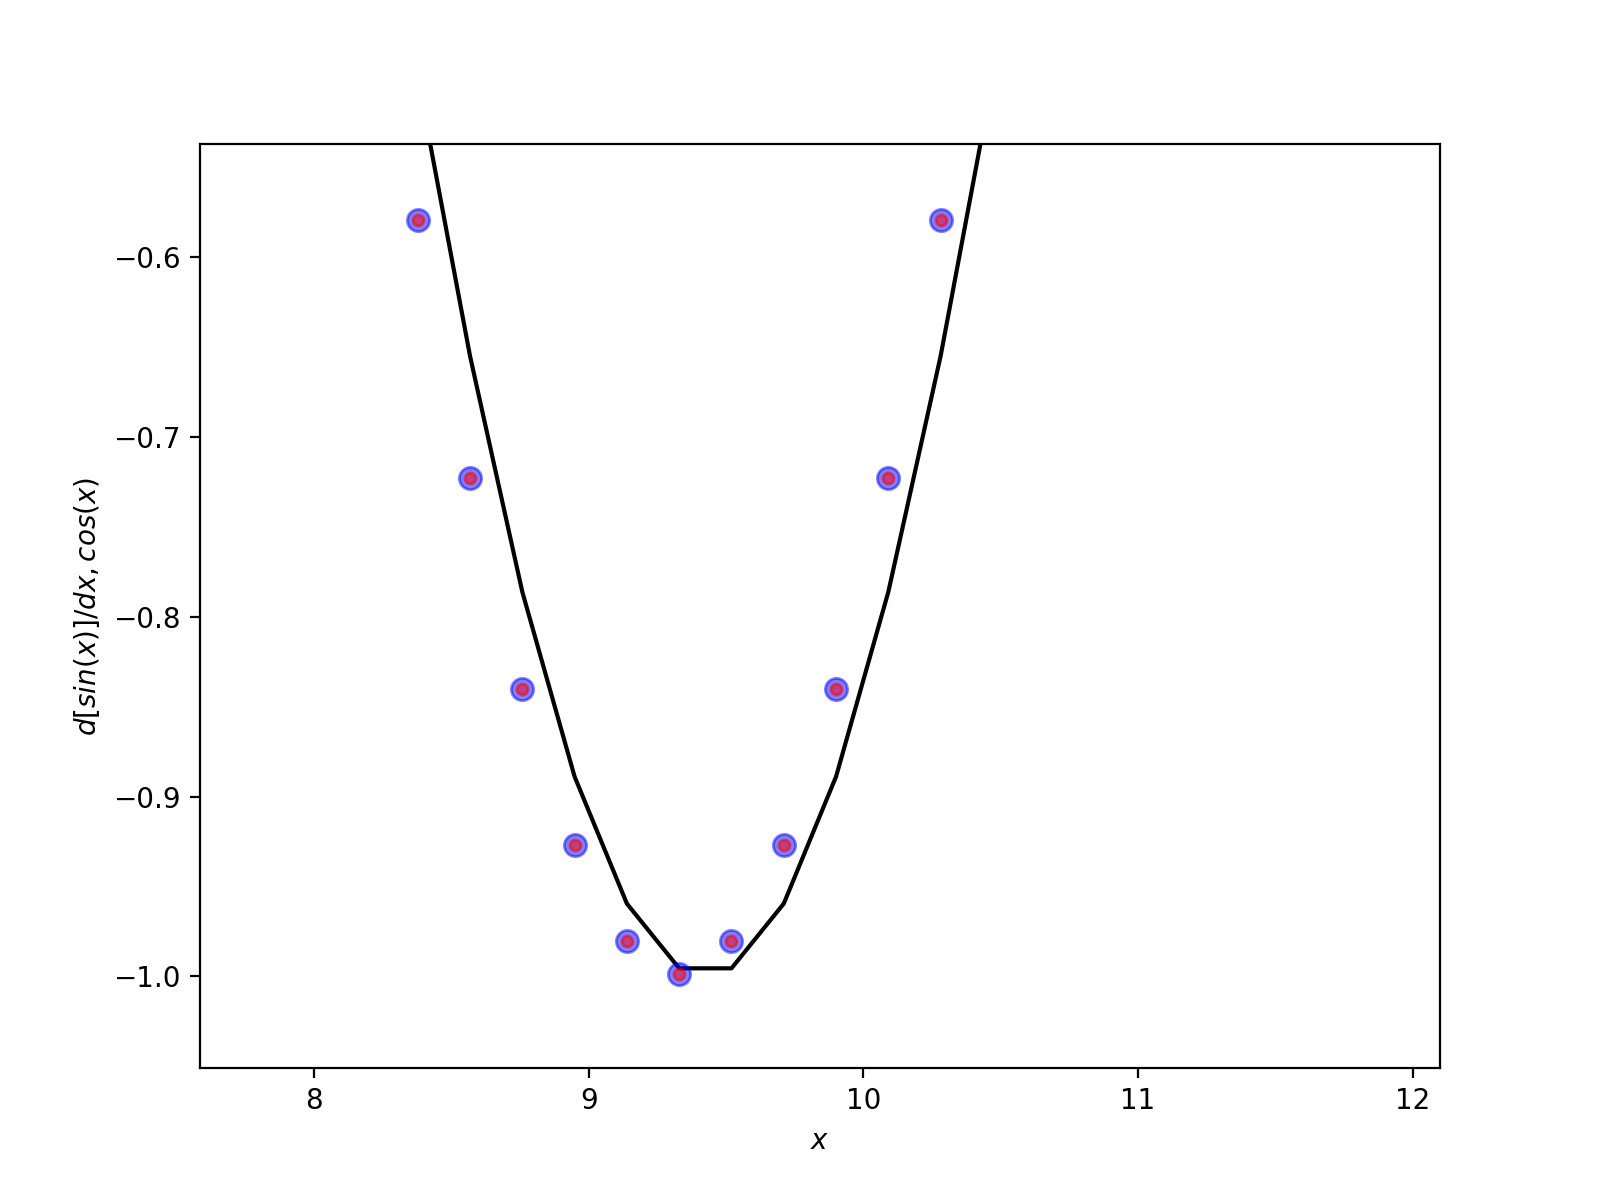

In [4]:
# for loop ---------------

dydx1 = zeros(N)

for i in range(0,ilast):
    dydx1[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
    
dydx1[ilast] = (y[ilast]-y[ilast-1])/(x[ilast]-x[ilast-1])

# array slicing ----------------------

dydx2 = zeros(N)

dydx2[:-1] = (y[1:]-y[:-1])/(x[1:]-x[:-1])
dydx2[ilast] = (y[ilast]-y[ilast-1])/(x[ilast]-x[ilast-1])

# plot the two and compare with the analytic derivative d[sin(x)]/dx = cos(x)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, cos(x), color='black', label='cos(x)')
ax.plot(x, dydx1, 'o',color='blue', alpha=0.5, markersize=8, label='dy/dx loop')
ax.plot(x, dydx2, 'o',color='red', alpha=0.5, markersize=4, label='dy/dx array')
ax.set_xlabel('$x$')
ax.set_ylabel('$d[sin(x)]/dx, cos(x)$');

### Now let's look at the difference in the computational time between the loop and the array

In [5]:
%%timeit
for i in range(0,ilast):
    dydx1[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
    
dydx1[ilast] = (y[ilast]-y[ilast-1])/(x[ilast]-x[ilast-1])

51.2 µs ± 140 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%%timeit
dydx2[:-1] = (y[1:]-y[:-1])/(x[1:]-x[:-1])
dydx2[ilast] = (y[ilast]-y[ilast-1])/(x[ilast]-x[ilast-1])

2.89 µs ± 18.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Let's look at different FD approximations using array slicing

<IPython.core.display.Javascript object>


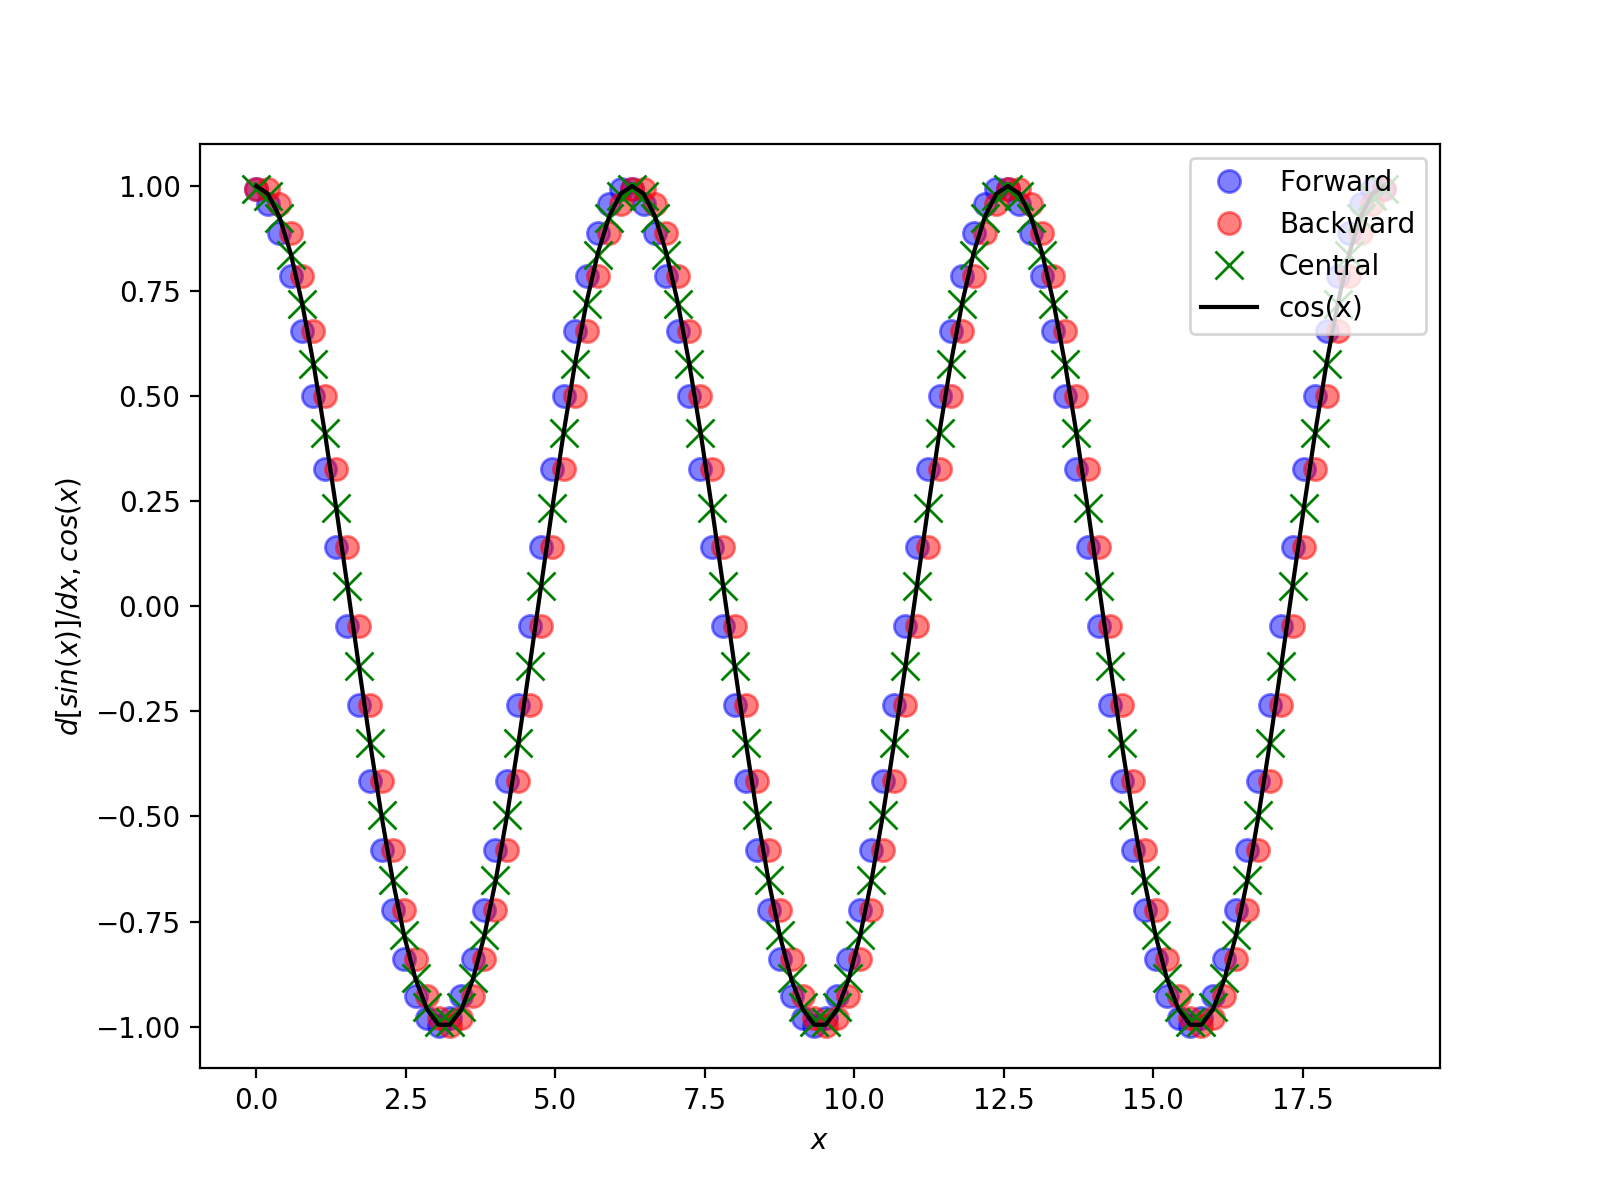

In [7]:
dydxF = zeros(N)
dydxB = zeros(N)
dydxC = zeros(N)

# Forward Difference
dydxF[:-1] = (y[1:]-y[:-1])/(x[1:]-x[:-1])
dydxF[ilast] = (y[ilast]-y[ilast-1])/(x[ilast]-x[ilast-1])

# Backward Difference
dydxB[1:] = (y[1:]-y[:-1])/(x[1:]-x[:-1])
dydxB[0] = (y[1]-y[0])/(x[1]-x[0])

# Central Difference
dydxC[1:-1] = (y[2:]-y[:-2])/(x[2:]-x[:-2])
dydxC[0] = (y[1]-y[0])/(x[1]-x[0])
dydxC[ilast] = (y[ilast]-y[ilast-1])/(x[ilast]-x[ilast-1])

# plot the output
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, dydxF, 'o', color='blue', alpha=0.5, markersize=8, label='Forward')
ax.plot(x, dydxB, 'o', color='red', alpha=0.5, markersize=8, label='Backward')
ax.plot(x, dydxC, 'x', color='green', alpha=1, markersize=10, label='Central')
ax.plot(x, cos(x), color='black', label='cos(x)')
ax.set_xlabel('$x$')
ax.set_ylabel('$d[sin(x)]/dx, cos(x)$')
legend(loc=1);

<IPython.core.display.Javascript object>


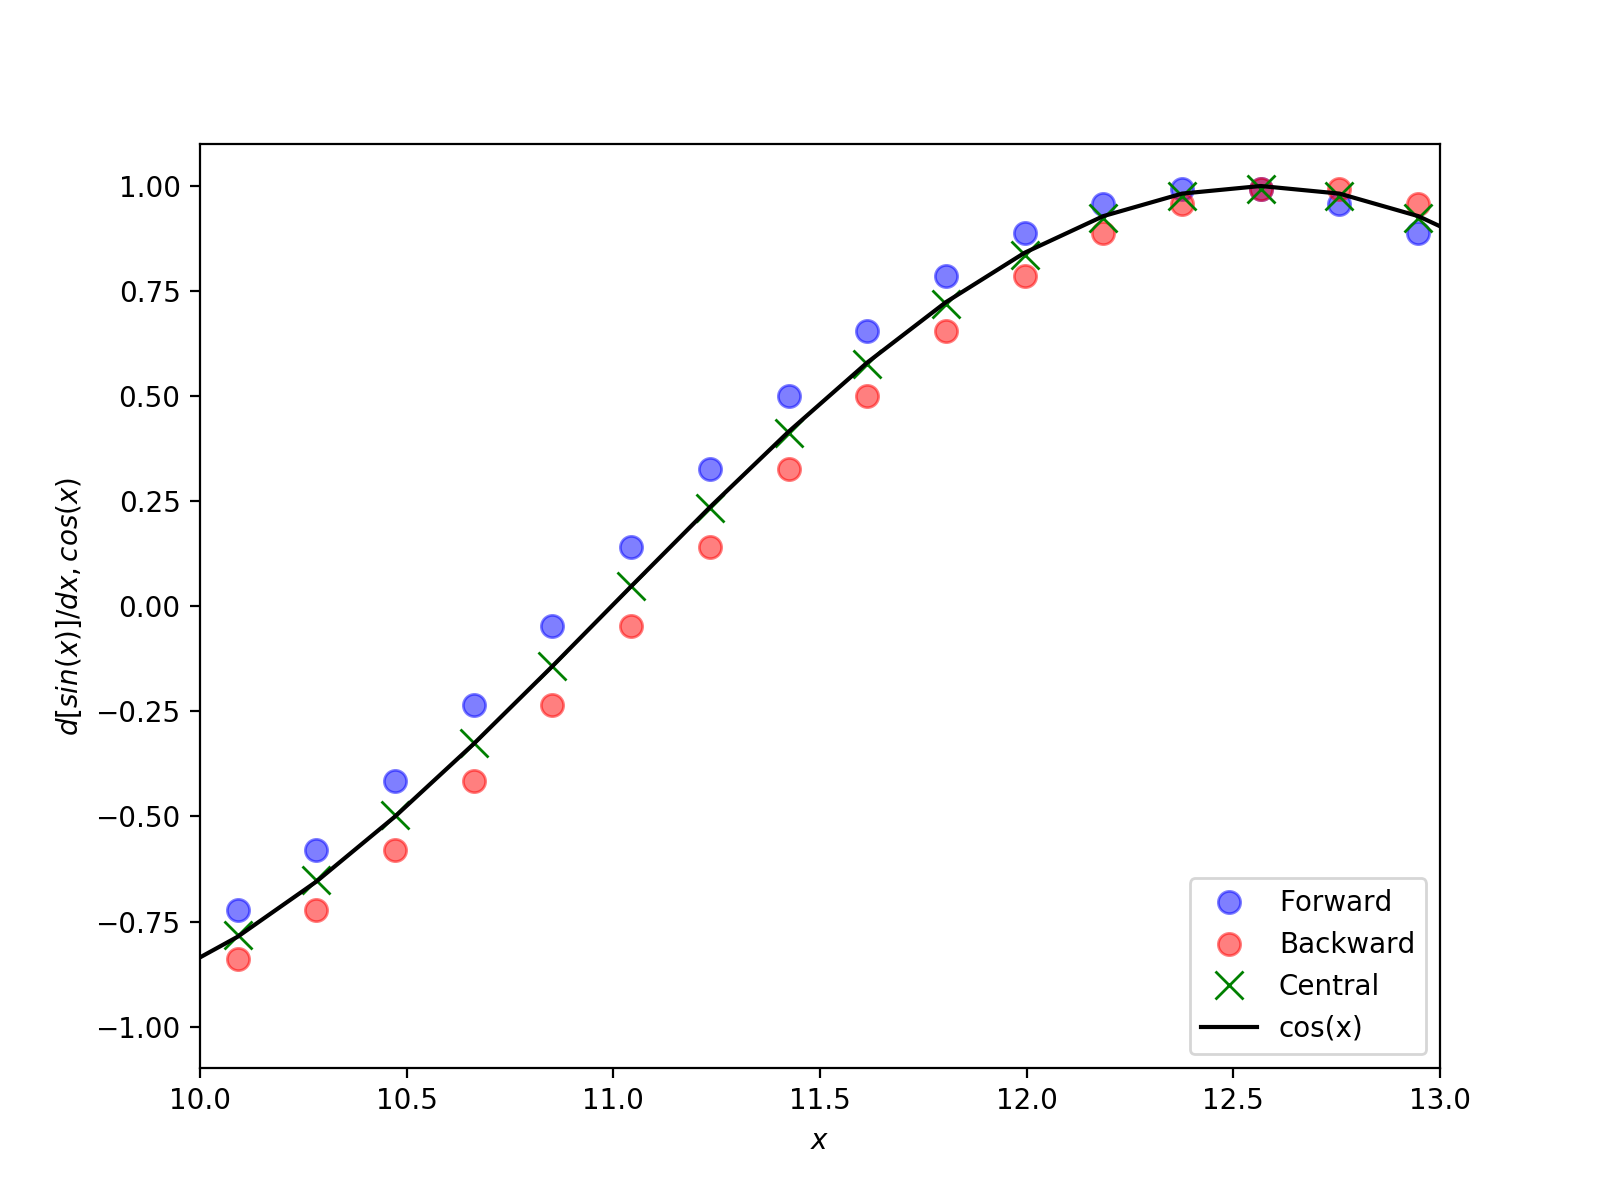

In [8]:
# zoom in some plot the output
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, dydxF, 'o', color='blue', alpha=0.5, markersize=8, label='Forward')
ax.plot(x, dydxB, 'o', color='red', alpha=0.5, markersize=8, label='Backward')
ax.plot(x, dydxC, 'x', color='green', alpha=1, markersize=10, label='Central')
ax.plot(x, cos(x), color='black', label='cos(x)')
ax.set_xlabel('$x$')
ax.set_ylabel('$d[sin(x)]/dx, cos(x)$')
ax.set_xlim(10,13)
legend(loc=4);

### What if we decrease $\Delta x$?

<IPython.core.display.Javascript object>


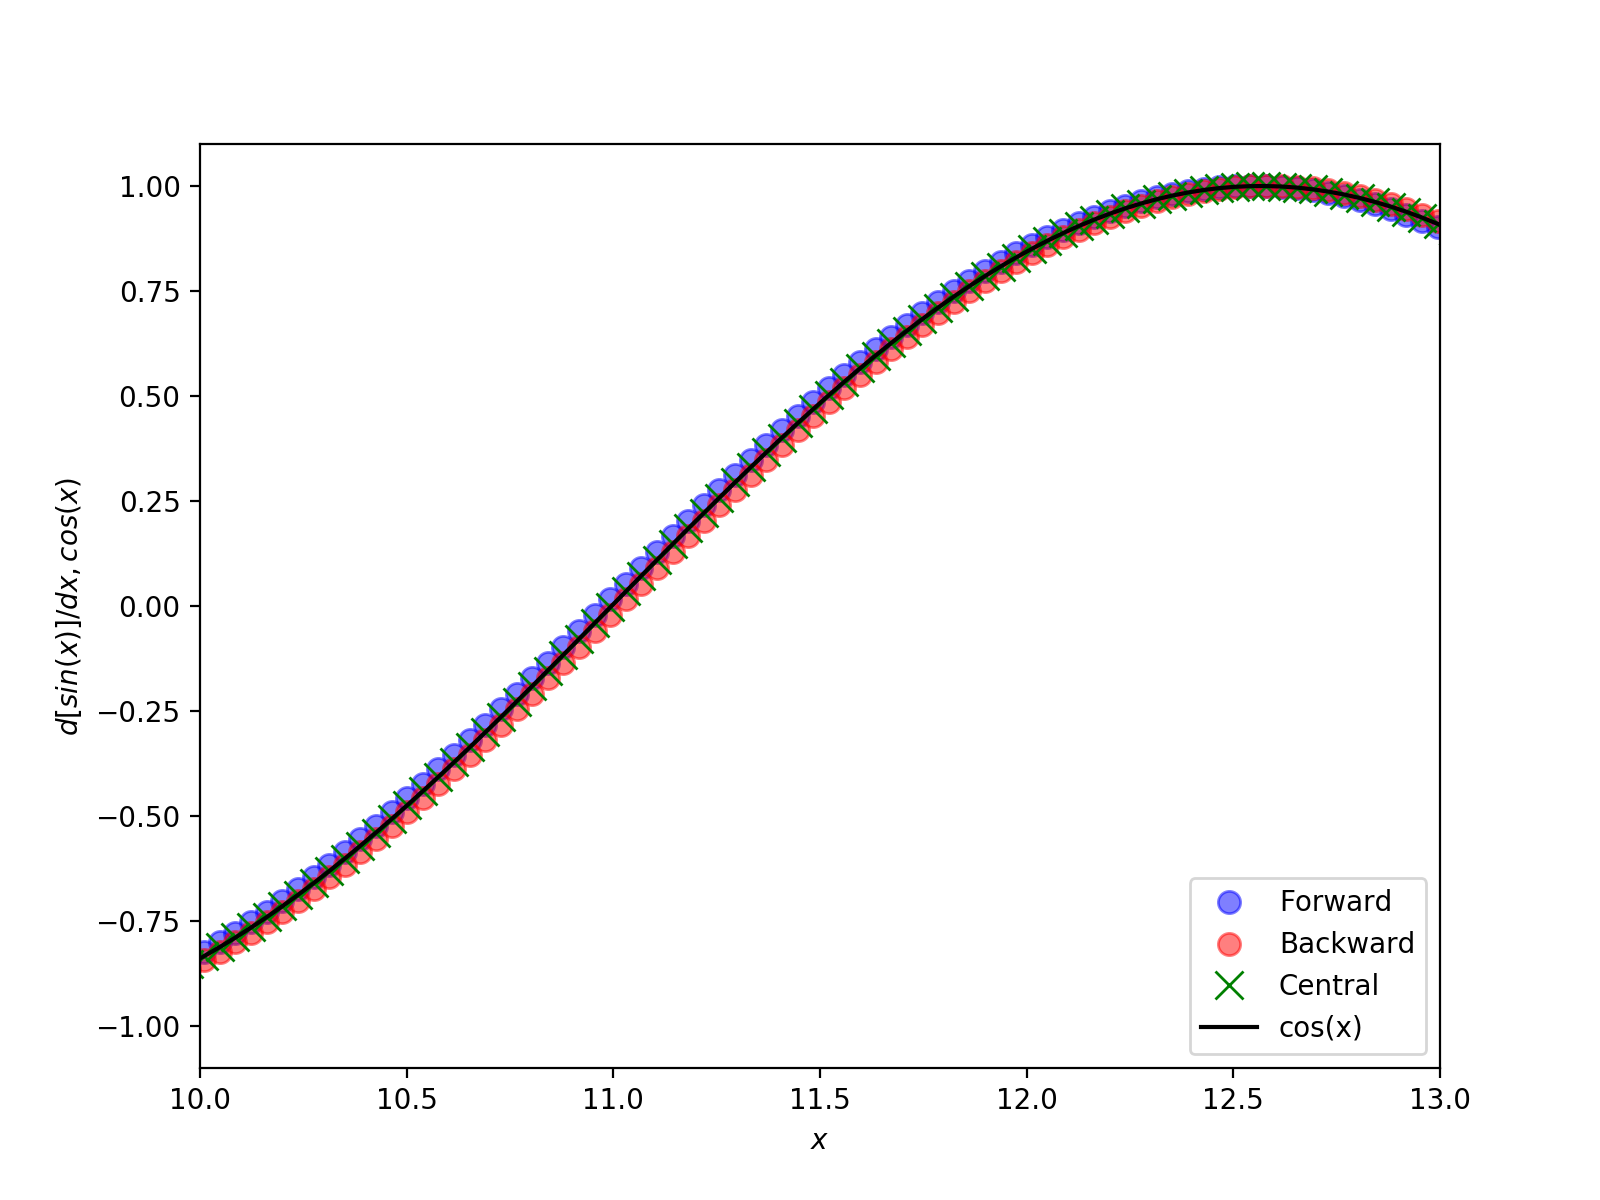

In [9]:
N = 500
ilast = N-1
x = linspace(0,6*pi,N)
y = sin(x)

dydxF = zeros(N)
dydxB = zeros(N)
dydxC = zeros(N)

# Forward Difference
dydxF[:-1] = (y[1:]-y[:-1])/(x[1:]-x[:-1])
dydxF[ilast] = (y[ilast]-y[ilast-1])/(x[ilast]-x[ilast-1])

# Backward Difference
dydxB[1:] = (y[1:]-y[:-1])/(x[1:]-x[:-1])
dydxB[0] = (y[1]-y[0])/(x[1]-x[0])

# Central Difference
dydxC[1:-1] = (y[2:]-y[:-2])/(x[2:]-x[:-2])
dydxC[0] = (y[1]-y[0])/(x[1]-x[0])
dydxC[ilast] = (y[ilast]-y[ilast-1])/(x[ilast]-x[ilast-1])

# plot the output
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, dydxF, 'o', color='blue', alpha=0.5, markersize=8, label='Forward')
ax.plot(x, dydxB, 'o', color='red', alpha=0.5, markersize=8, label='Backward')
ax.plot(x, dydxC, 'x', color='green', alpha=1, markersize=10, label='Central')
ax.plot(x, cos(x), color='black', label='cos(x)')
ax.set_xlabel('$x$')
ax.set_ylabel('$d[sin(x)]/dx, cos(x)$')
ax.set_xlim(10,13)
legend(loc=4);

<IPython.core.display.Javascript object>


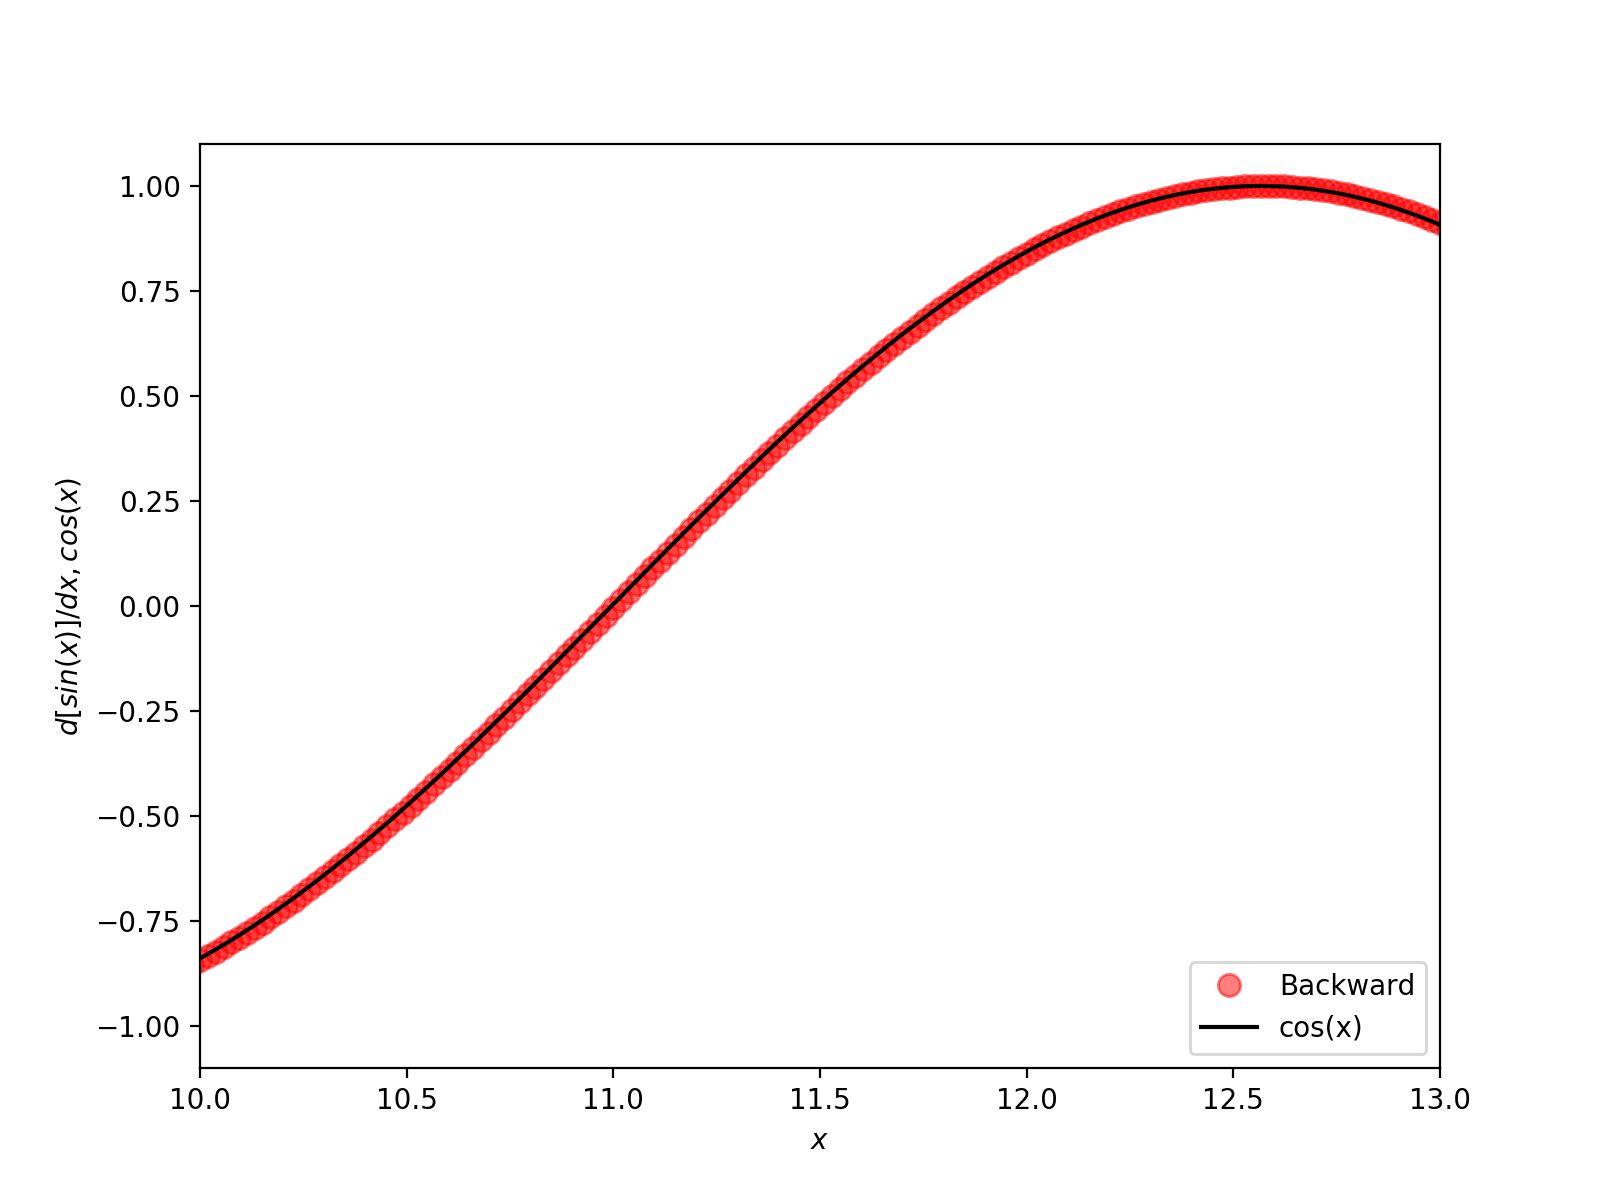

In [10]:
N = 1000
ilast = N-1
x = linspace(0,6*pi,N)
y = sin(x)

dydxF = zeros(N)
dydxB = zeros(N)
dydxC = zeros(N)

# Forward Difference
dydxF[:-1] = (y[1:]-y[:-1])/(x[1:]-x[:-1])
dydxF[ilast] = (y[ilast]-y[ilast-1])/(x[ilast]-x[ilast-1])

# Backward Difference
dydxB[1:] = (y[1:]-y[:-1])/(x[1:]-x[:-1])
dydxB[0] = (y[1]-y[0])/(x[1]-x[0])

# Central Difference
dydxC[1:-1] = (y[2:]-y[:-2])/(x[2:]-x[:-2])
dydxC[0] = (y[1]-y[0])/(x[1]-x[0])
dydxC[ilast] = (y[ilast]-y[ilast-1])/(x[ilast]-x[ilast-1])

# plot the output
fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(x, dydxF, 'o', color='blue', alpha=0.5, markersize=8, label='Forward N=1000')
ax.plot(x, dydxB, 'o', color='red', alpha=0.5, markersize=8, label='Backward')
# ax.plot(x, dydxC, 'x', color='green', alpha=1, markersize=10, label='Central')
ax.plot(x, cos(x), color='black', label='cos(x)')
ax.set_xlabel('$x$')
ax.set_ylabel('$d[sin(x)]/dx, cos(x)$')
ax.set_xlim(10,13)
legend(loc=4);